In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [2]:
train_df = pd.read_csv('./heart-attack-risk-analysis-dataset/train.csv')
test_df = pd.read_csv('./heart-attack-risk-analysis-dataset/test.csv')
# combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['Patient ID' 'Age' 'Sex' 'Cholesterol' 'Blood Pressure' 'Heart Rate'
 'Diabetes' 'Family History' 'Smoking' 'Obesity' 'Alcohol Consumption'
 'Exercise Hours Per Week' 'Diet' 'Previous Heart Problems'
 'Medication Use' 'Stress Level' 'Sedentary Hours Per Day' 'Income' 'BMI'
 'Triglycerides' 'Physical Activity Days Per Week' 'Sleep Hours Per Day'
 'Country' 'Continent' 'Hemisphere' 'Heart Attack Risk']


In [4]:
train_df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
5,KHV5233,64,Male,185,173/83,45,1,1,1,1,...,7.693001,42982,25.119107,746,7,5,Spain,Europe,Southern Hemisphere,1
6,ASX1153,86,Male,350,151/90,71,0,0,1,0,...,9.844307,173603,32.975464,367,0,5,France,Europe,Northern Hemisphere,0
7,IHZ5789,85,Male,246,145/76,81,0,0,1,1,...,1.308301,48258,35.143066,398,7,4,South Africa,Africa,Southern Hemisphere,1
8,SOL3892,61,Male,149,165/74,93,1,1,1,1,...,7.433028,298442,33.541112,85,6,7,Germany,Europe,Northern Hemisphere,1
9,CIN0912,28,Male,306,151/75,56,1,0,1,1,...,2.148214,224180,24.558969,729,2,5,Argentina,South America,Southern Hemisphere,0


In [5]:
train_df.tail(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
7000,MCT0325,64,Female,371,104/66,69,0,1,1,1,...,3.240391,103863,24.208147,160,2,10,Vietnam,Asia,Northern Hemisphere,0
7001,BBT2387,26,Male,185,140/71,110,1,1,1,1,...,1.402727,102011,34.726882,218,2,5,Brazil,South America,Southern Hemisphere,0
7002,GZL1934,85,Male,199,110/81,55,0,1,1,1,...,2.451802,49308,30.884526,31,5,10,India,Asia,Northern Hemisphere,1
7003,AQO5717,27,Female,387,136/103,109,1,1,0,0,...,8.722415,85825,32.965881,176,2,10,Vietnam,Asia,Northern Hemisphere,0
7004,UCB6977,68,Male,391,171/101,58,1,1,1,0,...,8.577241,210672,22.910692,613,5,4,United Kingdom,Europe,Northern Hemisphere,0
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,6.806894,236184,27.521246,598,4,5,France,Europe,Northern Hemisphere,0
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,3.015648,264390,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,4.825724,198358,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,6.546390,202828,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1
7009,CWO3455,61,Male,176,172/60,56,0,1,1,0,...,6.651328,25823,22.057046,224,7,10,India,Asia,Northern Hemisphere,0


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

* Above 50% of the patients are over 53 y/0 - This also appears to be a Normal distribution - mean == median. Could also be any other kind of
    symmetrical distribution [Continuous]
* Cholesterol seems to be a Gaussian distribution. Median and Mean seem to revolve around 259 [Continuous]
* The same goes for hear rate [Continuous]
* 50% or more people have diabetes [Binary]
* Around 25% of the people have family history [Binary]
* Around 75% or more people smoke [Binary]
* Around 25% of the people are obese [Binary]
* 50% or more people consume alcohol [Binary]
* Exercise per week appears to be a symmetrical distribution (mean == median) with mean around 10 [Continuous]
* About 25% people have previous heart problems [Binary]
* 50% or more people use medicine [Binary]
* Stress Level - appears to be a symmetrical distribution [Continuous]
* Sedentary hours per day - appears to be symmetrical [Continuous]
* Income also appears to be a symmetrical distribution [Continuous]
* BMI appears to be a symmetrical distribution [Continuous]
* Trigylcerida also appears to be a symmetrical distribution [Continuous]
* Physical Activity days per week appears to be a symmetrical distribution [Continuous]
* Sleep hours per day also appears to be a symmetrical distribution [Continuous]
* Around 25% of the people have heart attack risk


* **Continuous to Categorical**: Age, Cholesterol, heart rate, exercise per week, stress level, sedentary hours, income, bmi, triglyceride, physical activities, sleep  hours per day

In [7]:
train_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


* More males 
* Interesting a lot of people have the same blood pressures - there are only 3590 unique pressures. Maybe we could engineer a feature: the sum

In [8]:
train_df.describe(include=['O'])

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,7010,7010,7010,7010,7010,7010,7010
unique,7010,2,3590,3,20,6,2
top,RDG0550,Male,101/93,Healthy,Argentina,Asia,Northern Hemisphere
freq,1,4891,8,2351,386,2028,4526


## **Visualizing Categorical Data**
* Looks like sex, Diet, Country, Hemisphere is not all that useful
* Continent might be slightly useful - Americas, Africa and Australia lead to higher heart attack risk
* It might be worth grouping countries - first world country (higher risk), third world countries (lower risk) etc.

In [9]:
train_df[['Sex', 'Heart Attack Risk']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Heart Attack Risk
1,Male,0.358209
0,Female,0.354884


In [10]:
train_df[['Diet', 'Heart Attack Risk']].groupby(['Diet'], as_index=False).mean().sort_values(by='Diet', ascending=False)

,Diet,Heart Attack Risk
2,Unhealthy,0.362381
1,Healthy,0.364100
0,Average,0.345152


In [11]:
train_df[['Country', 'Heart Attack Risk']].groupby(['Country'], as_index=False).mean().sort_values(by='Country', ascending=False)

,Country,Heart Attack Risk
19,Vietnam,0.338068
18,United States,0.384848
17,United Kingdom,0.337875
16,Thailand,0.370262
15,Spain,0.348214
14,South Korea,0.401840
13,South Africa,0.345029
12,Nigeria,0.386111
11,New Zealand,0.340909
10,Japan,0.321637


In [12]:
train_df[['Continent', 'Heart Attack Risk']].groupby(['Continent'], as_index=False).mean().sort_values(by='Continent', ascending=False)

,Continent,Heart Attack Risk
5,South America,0.372727
4,North America,0.382006
3,Europe,0.343400
2,Australia,0.364146
1,Asia,0.347140
0,Africa,0.366097


In [13]:
train_df[['Hemisphere', 'Heart Attack Risk']].groupby(['Hemisphere'], as_index=False).mean().sort_values(by='Hemisphere', ascending=False)

,Hemisphere,Heart Attack Risk
1,Southern Hemisphere,0.354670
0,Northern Hemisphere,0.358595


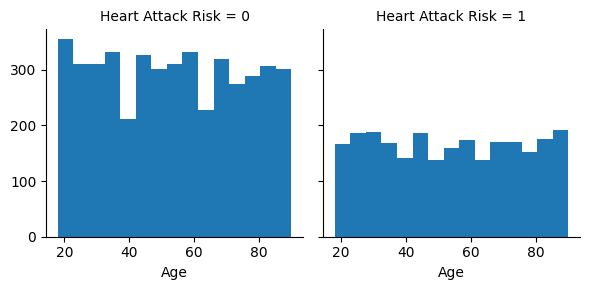

In [14]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=15)

## **Correlating Categorical features**

* Looks like there is a relationship between sex, continent (Especially for Asia & Female, North America & Female, Male & Europe) and their associated heart attack risk
* There is a strange relationship between diet and continent. Turns out Unhealthy diet leads lower risks compared to average & healthy diets in South America & Africa


* **For now, using diet, sex and continent**

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


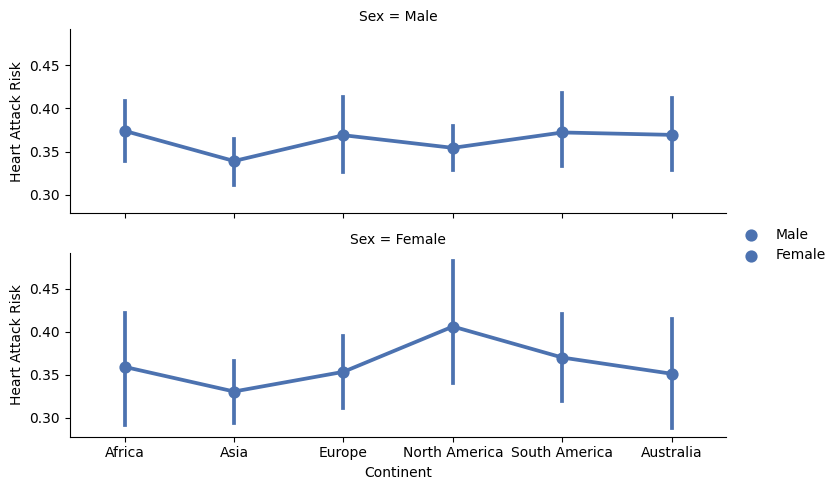

In [15]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


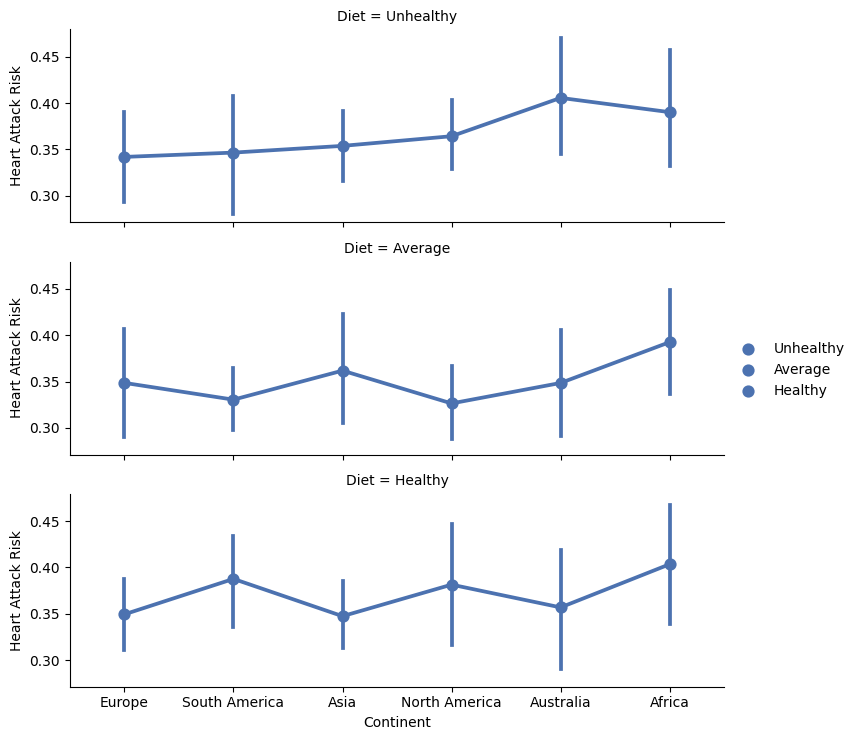

In [16]:
grid = sns.FacetGrid(train_df, row='Diet', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Diet', palette='deep')
grid.add_legend()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


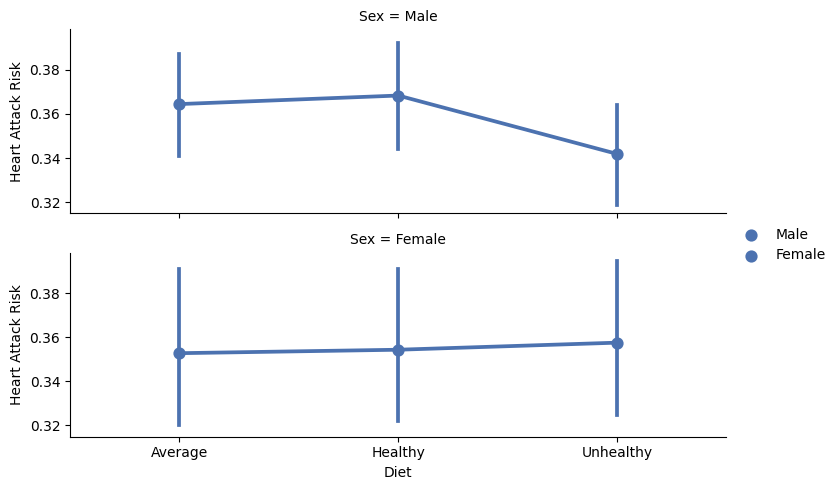

In [17]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Diet', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

## **Visualizing Continuous data**
* No relationship between age and risk 
* Seems to be a relationship between Cholesterol range and risk = 1
* Average diet but more exercise > less risk. Average diet but less exercise, more risk
* Don't see how stress level is useful
* Sedentary might be useful
* There seems to be a relationship between higher salary and higher risk. This might be a correlation through diet. [**Take a look later**]
* Seems to be a relationship between risk = 1, lower end of and the very high end of BMI
* Triglyceride seems to vary for risk = 1 ever so slightly
* No relation with physical activity days per week
* Sleep hours per day seems to influence (negative correlation) risk = 1

**For now taking Heart Rate, Cholesterol, exercise, sedentary, Income, BMI, Triglyceride, Sleep Hrs per day**

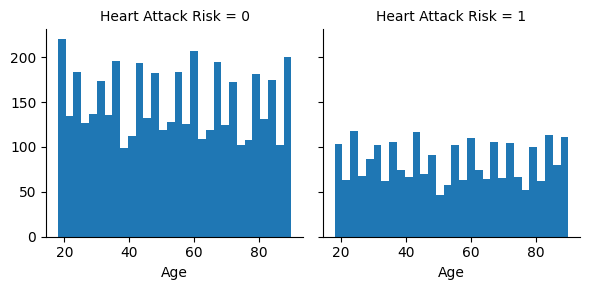

In [18]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=30)

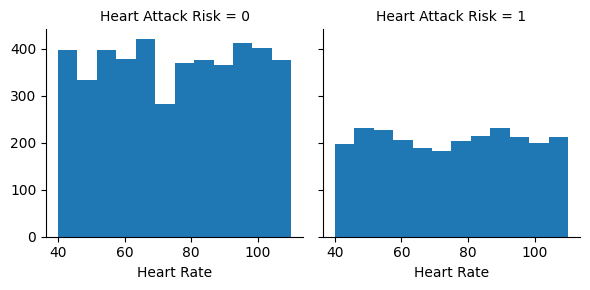

In [19]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Heart Rate', bins=12)

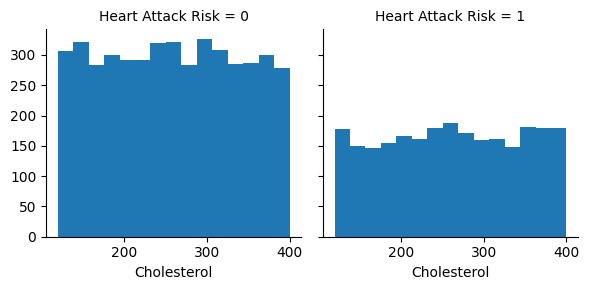

In [20]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Cholesterol', bins=15)

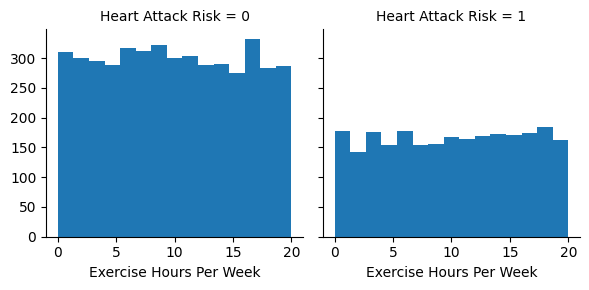

In [21]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Exercise Hours Per Week', bins=15)

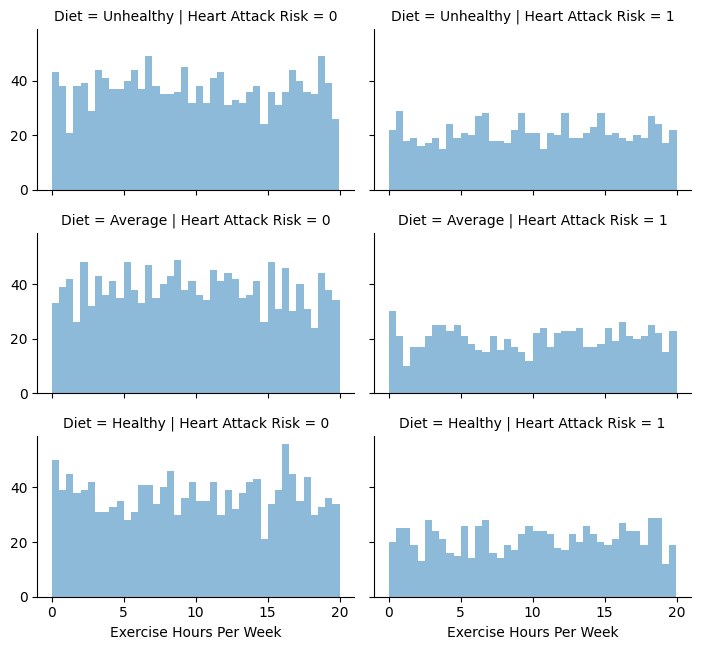

In [22]:
grid = sns.FacetGrid(train_df, col='Heart Attack Risk', row='Diet', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Exercise Hours Per Week', alpha=.5, bins=40)
grid.add_legend();

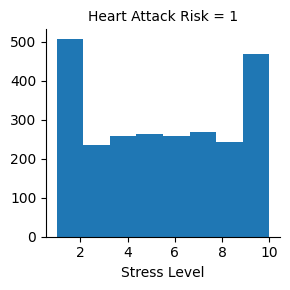

In [23]:
filtered_df = train_df[train_df['Heart Attack Risk'] == 1]
g = sns.FacetGrid(filtered_df, col='Heart Attack Risk')

g.map(plt.hist, 'Stress Level', bins=8)

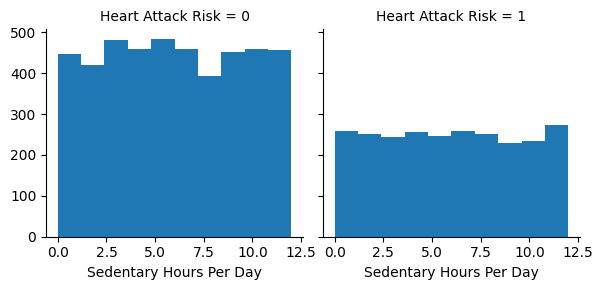

In [24]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sedentary Hours Per Day', bins=10)

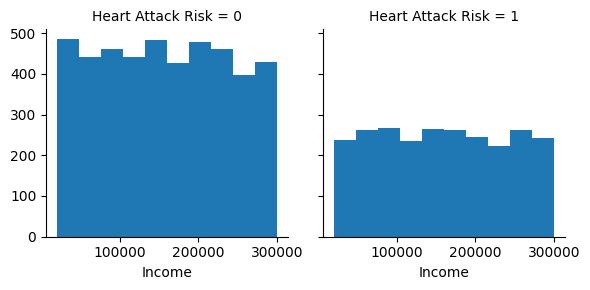

In [25]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Income', bins=10)

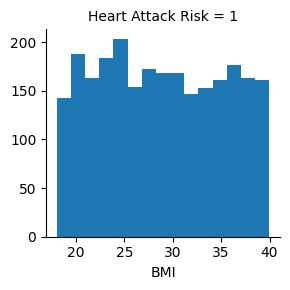

In [26]:
filtered_df = train_df[train_df['Heart Attack Risk'] == 1]
g = sns.FacetGrid(filtered_df, col='Heart Attack Risk')


g.map(plt.hist, 'BMI', bins=15)

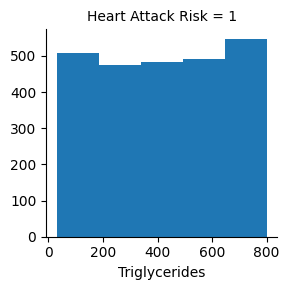

In [27]:
filtered_df = train_df[train_df['Heart Attack Risk'] == 1]
g = sns.FacetGrid(filtered_df, col='Heart Attack Risk')

g.map(plt.hist, 'Triglycerides', bins=5)

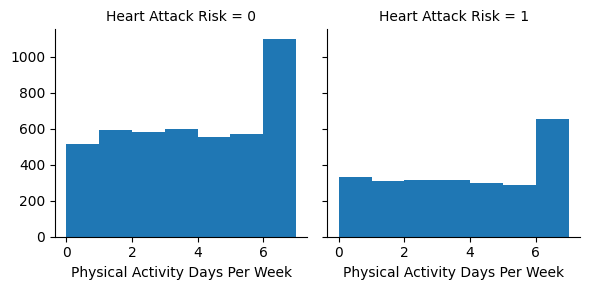

In [28]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Physical Activity Days Per Week', bins=7)

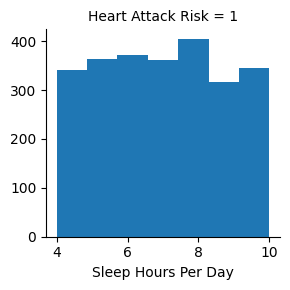

In [29]:
filtered_df = train_df[train_df['Heart Attack Risk'] == 1]
g = sns.FacetGrid(filtered_df, col='Heart Attack Risk')

g.map(plt.hist, 'Sleep Hours Per Day', bins=7)

## Correlating Binary Data
* Diabetes seems useful
* Family history seems irrelevant
* Smoking, Obesity, Alcohol consumption is inversely related (!!). **Might drop later or make one feature out of these**
* Previous heart problem seems useful
* Medication doesn't seem useful

**Using Diabetes, Smoking, Obesity, Alcohol, Previous Heart Problems**


In [30]:
train_df[["Diabetes", "Heart Attack Risk"]].groupby(['Diabetes'], as_index=False).mean().sort_values(by='Diabetes', ascending=True)

,Diabetes,Heart Attack Risk
0,0,0.336483
1,1,0.368226


In [31]:
train_df[["Family History", "Heart Attack Risk"]].groupby(['Family History'], as_index=False).mean().sort_values(by='Family History', ascending=True)

,Family History,Heart Attack Risk
0,0,0.359629
1,1,0.354698


In [32]:
train_df[["Smoking", "Heart Attack Risk"]].groupby(['Smoking'], as_index=False).mean().sort_values(by='Smoking', ascending=True)

,Smoking,Heart Attack Risk
0,0,0.364512
1,1,0.356358


In [33]:
train_df[["Obesity", "Heart Attack Risk"]].groupby(['Obesity'], as_index=False).mean().sort_values(by='Obesity', ascending=True)

,Obesity,Heart Attack Risk
0,0,0.363092
1,1,0.351313


In [34]:
train_df[["Alcohol Consumption", "Heart Attack Risk"]].groupby(['Alcohol Consumption'], as_index=False).mean().sort_values(by='Alcohol Consumption', ascending=True)

,Alcohol Consumption,Heart Attack Risk
0,0,0.362866
1,1,0.353364


In [35]:
train_df[["Previous Heart Problems", "Heart Attack Risk"]].groupby(['Previous Heart Problems'], as_index=False).mean().sort_values(by='Previous Heart Problems', ascending=True)

,Previous Heart Problems,Heart Attack Risk
0,0,0.350767
1,1,0.363688


In [36]:
train_df[["Medication Use", "Heart Attack Risk"]].groupby(['Medication Use'], as_index=False).mean().sort_values(by='Medication Use', ascending=True)

,Medication Use,Heart Attack Risk
0,0,0.357306
1,1,0.357102


## Data preprocessing

* Splitting up heart rate and take addition
* Clearly, the sum BP is correlated to Heart risk. The graph is left skewed when risk = 0 and right skewed when it's right skewed, so **using Sum BP**
* Converting diet, sex and continent - from categorical to numerical representation

In [37]:
#dropping all unrequired categorical columns
train_df = train_df.drop(['Patient ID', 'Country', 'Hemisphere'], axis=1)
test_df = test_df.drop(['Patient ID', 'Country', 'Hemisphere'], axis=1)

In [38]:
train_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,33,Male,200,129/90,48,0,1,1,1,1,...,2,0.138443,184066,30.449815,63,6,7,South America,1,219
1,56,Female,262,159/105,46,1,0,1,0,0,...,8,0.369552,211755,34.973685,333,7,8,Africa,1,264
2,19,Female,140,161/109,54,0,1,0,0,1,...,3,8.646334,252203,30.554246,537,2,10,Asia,0,270
3,50,Female,163,120/62,53,0,1,1,1,1,...,7,1.107884,121954,35.390265,591,0,9,Europe,1,182
4,89,Female,144,153/110,92,1,0,1,0,1,...,1,1.337570,180121,39.575483,145,2,5,Europe,1,263


In [39]:
#calculate the Sum BP for test set as well and drop Blood Pressure from both
test_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df = train_df.drop(['Blood Pressure'], axis=1)
test_df = test_df.drop(['Blood Pressure'], axis=1)

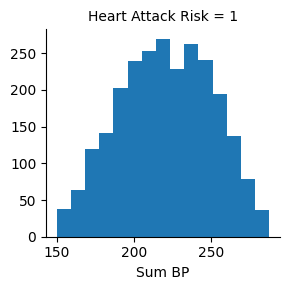

In [40]:
filtered_df = train_df[train_df['Heart Attack Risk'] == 1]
g = sns.FacetGrid(filtered_df, col='Heart Attack Risk')

g.map(plt.hist, 'Sum BP', bins=15)

In [41]:
def categoricalToNumeric(mapping, columnName):
        train_df[columnName] = train_df[columnName].map(mapping)
        test_df[columnName] = test_df[columnName].map(mapping)

In [42]:
#converting categorical diet, sex and continent to numeric
categoricalToNumeric({'Male':0, 'Female':1}, 'Sex')
categoricalToNumeric({'Unhealthy':0, 'Average':1, 'Healthy':2}, 'Diet')

continents = train_df['Continent'].unique()
continentsMapping = {continent:idx for idx,continent in enumerate(continents)}
categoricalToNumeric(continentsMapping, 'Continent')
train_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,33,0,200,48,0,1,1,1,1,7.807690,...,2,0.138443,184066,30.449815,63,6,7,0,1,219
1,56,1,262,46,1,0,1,0,0,17.297628,...,8,0.369552,211755,34.973685,333,7,8,1,1,264
2,19,1,140,54,0,1,0,0,1,8.695288,...,3,8.646334,252203,30.554246,537,2,10,2,0,270
3,50,1,163,53,0,1,1,1,1,10.161587,...,7,1.107884,121954,35.390265,591,0,9,3,1,182
4,89,1,144,92,1,0,1,0,1,16.436787,...,1,1.337570,180121,39.575483,145,2,5,3,1,263


In [43]:
#dropping unrequired continuous columns
train_df = train_df.drop(['Age','Stress Level', 'Physical Activity Days Per Week'], axis=1)
test_df = test_df.drop(['Age', 'Stress Level', 'Physical Activity Days Per Week'], axis=1)
train_df.head()

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,0,200,48,0,1,1,1,1,7.807690,0,0,1,0.138443,184066,30.449815,63,7,0,1,219
1,1,262,46,1,0,1,0,0,17.297628,1,1,0,0.369552,211755,34.973685,333,8,1,1,264
2,1,140,54,0,1,0,0,1,8.695288,1,1,1,8.646334,252203,30.554246,537,10,2,0,270
3,1,163,53,0,1,1,1,1,10.161587,2,0,1,1.107884,121954,35.390265,591,9,3,1,182
4,1,144,92,1,0,1,0,1,16.436787,2,1,0,1.337570,180121,39.575483,145,5,3,1,263


In [44]:
def continuousToCategorical(df,colName, minVal, maxVal, bins):
    interval = (maxVal-minVal)/(bins-1)
    # print("minVal, maxVal, bins, interval: ",minVal," ",maxVal," ",bins," ",interval)

    df.loc[ train_df[colName] <= minVal, colName] = 0
    currentMaxVal = minVal + interval
    label=1

    while currentMaxVal < maxVal:
        # print("minVal, currentMaxVal, label", minVal, " ", currentMaxVal, " ", label)
        df.loc[(df[colName] > minVal) & (df[colName] <= currentMaxVal), colName] = label
        minVal = currentMaxVal
        currentMaxVal += interval
        label += 1
    # print("currentMaxVal, label", " ", currentMaxVal, " ", label)
    df.loc[ df[colName] > (currentMaxVal-interval), colName] = label
    return df

In [45]:
# categorizing Cholesterol, exercise, sedentary, Income, BMI, Triglyceride, Sleep Hrs per day, Sum BP, heart rate
train_df = continuousToCategorical(train_df, 'Heart Rate', train_df['Heart Rate'].min(), train_df['Heart Rate'].max(), 12)
train_df = continuousToCategorical(train_df, 'Exercise Hours Per Week', train_df['Exercise Hours Per Week'].min(), train_df['Exercise Hours Per Week'].max(), 15)
train_df = continuousToCategorical(train_df, 'Sedentary Hours Per Day', train_df['Sedentary Hours Per Day'].min(), train_df['Sedentary Hours Per Day'].max(), 10)
train_df = continuousToCategorical(train_df, 'Income', train_df['Income'].min(), train_df['Income'].max(), 10)
train_df = continuousToCategorical(train_df, 'BMI', train_df['BMI'].min(), train_df['BMI'].max(), 15)
train_df = continuousToCategorical(train_df, 'Triglycerides', train_df['Triglycerides'].min(), train_df['Triglycerides'].max(), 5)
train_df = continuousToCategorical(train_df, 'Sleep Hours Per Day', train_df['Sleep Hours Per Day'].min(), train_df['Sleep Hours Per Day'].max(), 7)
train_df = continuousToCategorical(train_df, 'Sum BP', train_df['Sum BP'].min(), train_df['Sum BP'].max(), 15)
train_df = continuousToCategorical(train_df, 'Cholesterol', train_df['Cholesterol'].min(), train_df['Cholesterol'].max(), 15)

test_df = continuousToCategorical(test_df, 'Heart Rate', train_df['Heart Rate'].min(), train_df['Heart Rate'].max(), 12)
test_df = continuousToCategorical(test_df, 'Exercise Hours Per Week', train_df['Exercise Hours Per Week'].min(), train_df['Exercise Hours Per Week'].max(), 15)
test_df = continuousToCategorical(test_df, 'Sedentary Hours Per Day', train_df['Sedentary Hours Per Day'].min(), train_df['Sedentary Hours Per Day'].max(), 10)
test_df = continuousToCategorical(test_df, 'Income', train_df['Income'].min(), train_df['Income'].max(), 10)
test_df = continuousToCategorical(test_df, 'BMI', train_df['BMI'].min(), train_df['BMI'].max(), 15)
test_df = continuousToCategorical(test_df, 'Triglycerides', train_df['Triglycerides'].min(), train_df['Triglycerides'].max(), 5)
test_df = continuousToCategorical(test_df, 'Sleep Hours Per Day', train_df['Sleep Hours Per Day'].min(), train_df['Sleep Hours Per Day'].max(), 7)
test_df = continuousToCategorical(test_df, 'Sum BP', train_df['Sum BP'].min(), train_df['Sum BP'].max(), 15)
test_df = continuousToCategorical(test_df, 'Cholesterol', train_df['Cholesterol'].min(), train_df['Cholesterol'].max(), 15)

In [46]:
train_df.head(20)

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,0,4,2,0,1,1,1,1,6.0,0,0,1,1.0,6,8.0,1,3,0,1,7
1,1,8,1,1,0,1,0,0,13.0,1,1,0,1.0,7,11.0,2,4,1,1,12
2,1,1,3,0,1,0,0,1,7.0,1,1,1,7.0,8,8.0,3,6,2,0,12
3,1,3,3,0,1,1,1,1,8.0,2,0,1,1.0,4,12.0,3,5,3,1,4
4,1,2,9,1,0,1,0,1,12.0,2,1,0,2.0,6,14.0,1,1,3,1,12
5,0,4,1,1,1,1,1,0,3.0,2,0,1,6.0,1,5.0,4,1,3,1,11
6,0,12,5,0,0,1,0,0,10.0,2,0,1,8.0,5,10.0,2,1,3,0,10
7,0,7,7,0,0,1,1,1,10.0,0,0,0,1.0,1,11.0,2,0,1,1,8
8,0,2,9,1,1,1,1,0,3.0,2,1,0,6.0,9,10.0,1,3,3,1,9
9,0,10,3,1,0,1,1,0,13.0,2,1,1,2.0,7,5.0,4,1,0,0,8


In [47]:
#dropping binary cols we don't need
train_df = train_df.drop(['Family History', 'Medication Use'],axis=1)
test_def = test_df.drop(['Family History', 'Medication Use'],axis=1)
train_df.head()

,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Continent,Heart Attack Risk,Sum BP
0,0,4,2,0,1,1,1,6.0,0,0,1.0,6,8.0,1,3,0,1,7
1,1,8,1,1,1,0,0,13.0,1,1,1.0,7,11.0,2,4,1,1,12
2,1,1,3,0,0,0,1,7.0,1,1,7.0,8,8.0,3,6,2,0,12
3,1,3,3,0,1,1,1,8.0,2,0,1.0,4,12.0,3,5,3,1,4
4,1,2,9,1,1,0,1,12.0,2,1,2.0,6,14.0,1,1,3,1,12


## Model and train

* Linear SVM, SVC and LR didn't converge
* DT and RF overfit

In [48]:
#train test split

smt = SMOTE()

X = train_df.drop("Heart Attack Risk", axis=1)
Y = train_df["Heart Attack Risk"]
X, Y = smt.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

#number of positive and negative examples in training set
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, counts of label '1': 3605
Before OverSampling, counts of label '0': 3604 



In [49]:
# X_train = train_df.drop("Heart Attack Risk", axis=1)
# Y_train = train_df["Heart Attack Risk"]
# X_test  = test_df.drop("Heart Attack Risk", axis=1).copy()
# X_train.shape, Y_train.shape, X_test.shape

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


61.34

In [51]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Diet,0.009278
12,Triglycerides,0.003074
1,Heart Rate,0.002948
10,Income,0.001254
16,Sum BP,-0.000147
11,BMI,-0.011140
2,Diabetes,-0.015634
14,Continent,-0.051816
13,Sleep Hours Per Day,-0.078486
15,Heart Attack Risk,-0.079692


In [52]:
svc = SVC()
svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

61.34

Fine tuning SVC

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

param_grid = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validated score:  0.7469816480118118


In [67]:
#print precision, recall, f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

Y_pred = grid_search.predict(X_test)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Precision:  0.8246753246753247
Recall:  0.704772475027747
F1 Score:  0.7600239377618193


In [54]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


59.9

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

57.85

In [56]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

# Y_pred = random_forest.predict(X_test)

#random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
recall_score_random_forest = recall_score(Y_test, random_forest.predict(X_test))
precision_score_random_forest = precision_score(Y_test, random_forest.predict(X_test))
f1_score_random_forest = f1_score(Y_test, random_forest.predict(X_test))
report_random_forrest = "Random Forest: Accuracy: {}, Recall: {}, Precision: {}, F1: {}".format(acc_random_forest, recall_score_random_forest, precision_score_random_forest, f1_score_random_forest)

#acc_random_forest
print(report_random_forrest)

Random Forest: Accuracy: 68.72, Recall: 0.634850166481687, Precision: 0.7087980173482032, F1: 0.6697892271662763


In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,68.72
0,Support Vector Machines,61.34
1,Logistic Regression,61.34
3,Linear SVC,59.90
4,Decision Tree,57.85


Random forrest grid search for fine tuning


In [58]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 4, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Initialize the classifier
# rf = RandomForestClassifier()

# # Initialize the Grid Search model
# grid_search = GridSearchCV(
#     estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, Y_train)

# # Print the best parameters
# print("Best parameters found: ", grid_search.best_params_)

In [59]:
random_forest = RandomForestClassifier(n_estimators=300, max_depth= 30, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
random_forest.fit(X_train, Y_train)

# Y_pred = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
recall_score_random_forest = recall_score(
    Y_test, random_forest.predict(X_test))
precision_score_random_forest = precision_score(
    Y_test, random_forest.predict(X_test))
f1_score_random_forest = f1_score(Y_test, random_forest.predict(X_test))
report_random_forrest = "Random Forest: Accuracy: {}, Recall: {}, Precision: {}, F1: {}".format(
    acc_random_forest, recall_score_random_forest, precision_score_random_forest, f1_score_random_forest)

# acc_random_forest
print(report_random_forrest)

Random Forest: Accuracy: 70.72, Recall: 0.6548279689234184, Precision: 0.7311028500619579, F1: 0.6908665105386417


Bagging and boosting

In [60]:
# from sklearn.ensemble import BaggingClassifier
# #from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# # Base estimator: a simple decision tree
# base_estimator = RandomForestClassifier(
#     n_estimators=100, max_depth=40, max_features='auto', min_samples_leaf=1, min_samples_split=2)

# # Bagging ensemble of decision trees
# bagging_classifier = BaggingClassifier(
#     base_estimator=base_estimator,
#     n_estimators=100,  # Number of trees
#     max_samples=0.8,   # Fraction of samples to draw from X to train each base estimator
#     max_features=0.8,  # Fraction of features to draw from X to train each base estimator
#     n_jobs=-1,         # Use all available cores
#     random_state=0
# )

# # Fit the bagging classifier
# bagging_classifier.fit(X_train, Y_train)

# # Make predictions
# Y_pred = bagging_classifier.predict(X_test)

# # Evaluate the model
# acc_bagging = round(accuracy_score(Y_test, Y_pred) * 100, 2)
# recall_bagging = recall_score(Y_test, Y_pred)
# precision_bagging = precision_score(Y_test, Y_pred)
# f1_bagging = f1_score(Y_test, Y_pred)

# # Print the evaluation report
# report_bagging = "Bagging (Decision Trees): Accuracy: {}, Recall: {}, Precision: {}, F1: {}".format(
#     acc_bagging, recall_bagging, precision_bagging, f1_bagging)
# print(report_bagging)

Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize the XGBClassifier
adaboost_classifier = AdaBoostClassifier(
    n_estimators=1000, learning_rate=0.01, random_state=0, base_estimator=random_forest)

# Fit the model
adaboost_classifier.fit(X_train, Y_train)

# Predictions
Y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
acc_xgb = round(accuracy_score(Y_test, Y_pred) * 100, 2)
recall_xgb = recall_score(Y_test, Y_pred)
precision_xgb = precision_score(Y_test, Y_pred)
f1_xgb = f1_score(Y_test, Y_pred)

# Report
report_xgb = f"adaboost: Accuracy: {acc_xgb}, Recall: {recall_xgb}, Precision: {precision_xgb}, F1: {f1_xgb}"
print(report_xgb)

adaboost: Accuracy: 70.11, Recall: 0.632630410654828, Precision: 0.7326478149100257, F1: 0.6789755807027993


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Determine the input shape (features, 1) since it's 1D CNN
input_shape = (X_train.shape[1], 1)

# Initialize the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
          input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Add dropout
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Add dropout
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)  # Adjust learning rate

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              # Use 'categorical_crossentropy' for multi-class classification
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Convert DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Reshape the data to fit the model input, adding an extra dimension for the channels
X_train_reshaped = X_train_np.reshape(
    (X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape(
    (X_test_np.shape[0], X_test_np.shape[1], 1))

# Train the model
model.fit(X_train_reshaped, Y_train, epochs=100,
          batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Make predictions (optional)
# Y_pred = model.predict(X_test_reshaped)
# Process Y_pred as needed for your application

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 32)                14368     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

Testing KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score     
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model on your training data
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.72
Recall: 0.86
Precision: 0.67
F1 Score: 0.76


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then, fit the KNN model using the scaled data
knn.fit(X_train_scaled, Y_train)

Y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.50
Recall: 0.98
Precision: 0.50
F1 Score: 0.66


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Applying K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # n_clusters is a key parameter
kmeans.fit(X)
clusters = kmeans.predict(X)

# Evaluating performance
# Using silhouette score as well
silhouette = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.12


In [64]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('adaboost', adaboost_classifier),
    ('random_forest', random_forest),
    ('knn', knn),
    ('svc', grid_search)
]

# Define meta-model
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model
stacking_model.fit(X_train, Y_train)

# Evaluate the model
accuracy = stacking_model.score(X_test, Y_test)
print(f"Stacking Model Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Stacking Model Accuracy: 0.78


In [65]:
# print the precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test, stacking_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.75      0.85      0.80       902
           1       0.83      0.71      0.77       901

    accuracy                           0.78      1803
   macro avg       0.79      0.78      0.78      1803
weighted avg       0.79      0.78      0.78      1803

